# 3. Autoencoding Language Models
自动编码语言模型

## Preparation for Google Colab

In [ ]:
import os
from google.colab import drive

#  挂载 google 云盘
drive.mount("/content/drive")

print(os.getcwd())  # /content

# print(os.listdir("/content/drive/MyDrive/"))

# print(os.listdir("/content/drive/MyDrive/Colab Notebooks"))

# if os.getcwd() != "/content/drive/MyDrive":
#     os.chdir("/content/drive/MyDrive")

# print(os.getcwd())

In [ ]:
# 提前将 requirements.txt 放在 google 云盘上
!pip install -r /content/drive/MyDrive/requirements.txt

In [3]:
subdir = "ch03b"
work_path = "/content/drive/MyDrive/" + subdir
if not os.path.exists(work_path):
    os.mkdir(work_path)
os.chdir(work_path)
print(os.getcwd())

/content/drive/MyDrive/ch03b


In [4]:
!apt-get install tree && tree -a "./"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
./
└── albert.png

0 directories, 1 file


## BERT-BASE

In [5]:
# BERT-BASE (L=12, H=768, A=12, Total Parameters=110M)
from transformers import BertConfig, BertModel

bert_base = BertConfig()
model = BertModel(bert_base)
print(f"{model.num_parameters() /(10**6)} million parameters")

109.48224 million parameters


## Albert-base

In [6]:
# Albert-base Configuration
from transformers import AlbertConfig, AlbertModel

albert_base = AlbertConfig(
    hidden_size=768,
    num_attention_heads=12,
    intermediate_size=3072,
)
model = AlbertModel(albert_base)
print(f"{model.num_parameters() /(10**6)} million parameters")

11.683584 million parameters


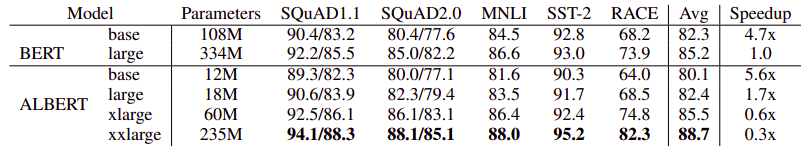

In [7]:
# Table from the original ALBERT paper
from IPython.display import Image

albert = Image(filename="albert.png")

display(albert)

In [8]:
# BERT-LARGE (L=24, H=1024, A=16, Total Parameters=340M).
from transformers import BertConfig, BertModel

bert_large = BertConfig(
    hidden_size=1024,
    num_hidden_layers=24,
    num_attention_heads=16,
    intermediate_size=4096,
)
model = BertModel(bert_large)
print(f"{model.num_parameters() /(10**6)} million parameters")

335.141888 million parameters


In [9]:
# ALBERT-xxlarge configuration  by default
from transformers import AlbertConfig, AlbertModel

albert_xxlarge = AlbertConfig()
model = AlbertModel(albert_xxlarge)
print(f"{model.num_parameters() /(10**6)} million parameters")

222.595584 million parameters


## how to use Albert model

In [10]:
from transformers import AlbertTokenizer, AlbertModel

tokenizer = AlbertTokenizer.from_pretrained("albert-large-v2")
model = AlbertModel.from_pretrained("albert-large-v2")
text = "The cat is so sad ."
encoded_input = tokenizer(text, return_tensors="pt")
output = model(**encoded_input)
output

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/71.5M [00:00<?, ?B/s]

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.0818,  0.0084,  0.0581,  ...,  0.6829,  0.0923, -0.0742],
         [-0.5283, -0.2861, -0.4179,  ..., -0.2792, -0.7317,  0.7670],
         [-0.3925, -0.1712, -0.5876,  ..., -0.3523,  0.0790, -0.1090],
         ...,
         [-0.2562,  0.2033,  0.0390,  ...,  0.4328,  0.6648, -0.5900],
         [ 0.1277, -0.5665, -1.5202,  ...,  0.2439, -0.5926, -0.6402],
         [ 0.0044,  0.0468,  0.0043,  ...,  0.0574,  0.1113, -0.0268]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 0.9533, -0.5495,  0.9946,  ...,  0.5541, -0.5789, -0.3480]],
       grad_fn=<TanhBackward0>), hidden_states=None, attentions=None)

In [11]:
from transformers import pipeline
import pandas as pd

fillmask = pipeline("fill-mask", model="albert-base-v2")
pd.DataFrame(fillmask("The cat is so [MASK] ."))

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForMaskedLM: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Device set to use cpu


,score,token,token_str,sequence
0,0.281031,10901,cute,the cat is so cute .
1,0.094895,26354,adorable,the cat is so adorable .
2,0.042963,1700,happy,the cat is so happy .
3,0.040976,5066,funny,the cat is so funny .
4,0.024234,28803,affectionate,the cat is so affectionate .


## ROBERTA

In [12]:
from transformers import RobertaTokenizer, RobertaModel

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")
text = "The cat is so sad ."
encoded_input = tokenizer(text, return_tensors="pt")
output = model(**encoded_input)
output

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0447,  0.0859, -0.0320,  ..., -0.0931, -0.0861,  0.0245],
         [-0.2022,  0.0513,  0.0305,  ..., -0.2837, -0.0997,  0.0230],
         [ 0.0634,  0.1971,  0.0824,  ..., -0.3627, -0.0988,  0.1092],
         ...,
         [ 0.0369,  0.1911,  0.1583,  ...,  0.3582, -0.1101, -0.0475],
         [ 0.0420, -0.1232,  0.1039,  ..., -0.2203, -0.1517,  0.0842],
         [-0.0344,  0.0863, -0.0630,  ..., -0.1472, -0.0897,  0.0196]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 3.6035e-02, -8.6034e-02,  1.5793e-01, -1.5793e-01,  7.4206e-02,
         -6.2091e-02,  3.7234e-02,  1.0273e-01, -9.2539e-02,  1.7358e-01,
         -5.9370e-02,  2.0913e-01,  3.4148e-01,  3.8531e-01, -2.9242e-01,
          1.9201e-01, -1.4729e-02,  1.8786e-01,  1.4502e-01,  1.9492e-02,
         -2.6898e-01,  7.0602e-03, -3.4663e-02, -2.7346e-02, -1.8677e-01,
         -3.4883e-02, -4.1481e-01,  1.8487e-01,  4.6643e-02,  3.714

In [13]:
from transformers import RobertaConfig, RobertaModel

conf = RobertaConfig()
model = RobertaModel(conf)
print(f"{model.num_parameters() /(10**6)} million parameters")

124.644864 million parameters


In [14]:
from transformers import pipeline

fillmask = pipeline("fill-mask", model="roberta-base")
pd.DataFrame(fillmask("The cat is so <mask> ."))

Device set to use cpu


,score,token,token_str,sequence
0,0.203104,11962,cute,The cat is so cute .
1,0.048501,4045,sweet,The cat is so sweet .
2,0.034573,19222,handsome,The cat is so handsome .
3,0.034407,6269,funny,The cat is so funny .
4,0.032647,2721,beautiful,The cat is so beautiful .


In [15]:
tokenizer = AlbertTokenizer.from_pretrained("albert-base-v2")
print(tokenizer.mask_token)
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
print(tokenizer.mask_token)

[MASK]
<mask>


In [16]:
from transformers import pipeline

fillmask = pipeline("fill-mask", model="google/electra-small-generator")
q = fillmask(f"The cat is very {fillmask.tokenizer.mask_token} .")
pd.DataFrame(q)

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


,score,token,token_str,sequence
0,0.098158,5379,friendly,the cat is very friendly.
1,0.086665,10140,cute,the cat is very cute.
2,0.054569,7591,sensitive,the cat is very sensitive.
3,0.033855,11004,shy,the cat is very shy.
4,0.031776,6047,smart,the cat is very smart.
